In [0]:
#Loading the dataset more description is given below
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Principal Components Analysis
**Introduction** <br>
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. <br>

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image. <br>

**But where all you can apply PCA?** <br>
**Data Visualization:** <br> When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

**Speeding Machine Learning (ML) Algorithm:** <br> Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow. <br>

**About the Dataset:** <br>
CIFAR - 10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.

The dataset consists of 50000 training images and 10000 test images.

The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.



In [8]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [9]:
# Find the unique numbers from the train labels
import numpy as np

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


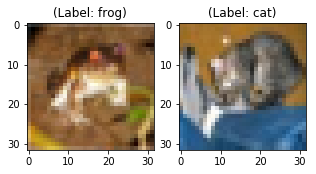

In [10]:
#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels.
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [12]:
#Data Visualization
x_train = x_train/255.0 #Normalizing the data

#Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.
import pandas as pd

#But before that, let's reshape the image dimensions from three to one (flatten the images).
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


In [13]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,0.000830,0.000646,0.001507,0.001123,0.000800,0.001830,0.001399,0.000969,0.002138,0.001646,0.001153,0.002230,0.001692,0.001230,0.002291,0.001799,0.001369,0.002291,0.001845,0.001430,0.002015,0.001584,0.001184,0.001922,0.001522,0.001169,0.002184,0.001769,0.001399,0.002215,...,0.002276,0.001584,0.001184,0.002476,0.001615,0.001061,0.002215,0.001461,0.000846,0.001722,0.001384,0.000907,0.001830,0.001399,0.000892,0.001999,0.001476,0.001000,0.001845,0.001338,0.000907,0.001415,0.001030,0.000707,0.001584,0.001200,0.000877,0.002614,0.002153,0.001599,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,6
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,0.001553,0.001522,0.001922,0.002015,0.002138,0.002384,0.002553,0.002768,0.002645,0.002922,0.003230,0.002768,0.003060,0.003291,0.002184,0.002399,0.002399,0.001707,0.001845,0.001692,0.001630,0.001646,0.001507,0.001676,0.001599,0.001569,0.001892,0.001861,0.001799,0.001953,...,0.000077,0.000092,0.000169,0.000092,0.000092,0.000169,0.000154,0.000138,0.000185,0.000384,0.000338,0.000338,0.000784,0.000692,0.000646,0.001046,0.000984,0.001030,0.001384,0.001384,0.001553,0.001784,0.001738,0.001876,0.002061,0.001953,0.002045,0.002153,0.001999,0.002092,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,9
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001169,0.001384,0.001384,0.001107,0.001323,0.001323,0.000984,0.001200,0.001200,0.000984,0.001200,0.001200,0.001061,0.001276,0.001276,0.001015,0.001230,0.001230,0.000846,0.001061,0.001061,0.000800,0.001015,0.001015,0.000892,0.001107,0.001107,0.001046,0.001230,0.001215,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,9
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,0.000569,0.000354,0.000677,0.000600,0.000384,0.000615,0.000569,0.000338,0.000615,0.000584,0.000354,0.000369,0.000354,0.000138,0.000492,0.000384,0.000231,0.000661,0.000415,0.000292,0.000461,0.000308,0.000154,0.000492,0.000461,0.000261,0.000631,0.000569,0.000354,0.000800,...,0.001876,0.001522,0.001030,0.001646,0.001307,0.000830,0.001722,0.001476,0.001015,0.001415,0.001246,0.000815,0.001230,0.000953,0.000600,0.001476,0.001200,0.000907,0.001184,0.001030,0.000646,0.001307,0.001169,0.000677,0.001292,0.001153,0.000738,0.001030,0.000877,0.000584,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,4
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,0.002968,0.003245,0.002784,0.003014,0.003353,0.002722,0.002999,0.003383,0.002784,0.002999,0.003429,0.002830,0.002953,0.003429,0.002907,0.002922,0.003429,0.002907,0.002907,0.003414,0.002891,0.002968,0.003445,0.002814,0.002983,0.003429,0.002799,0.002983,0.003429,0.002830,...,0.001430,0.001507,0.001569,0.001384,0.001461,0.

In [0]:
#PCA Step reducing to 2 components
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1]) #This means taking everything except the first column

In [0]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
# converting the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame

In [17]:
principal_cifar_Df.head(n=30)

,principal component 1,principal component 2,y
0,-0.025102,0.010702,6
1,0.003254,-0.003725,9
2,0.030315,-0.045185,9
3,-0.040580,0.000042,4
4,-0.010297,-0.019487,1
5,-0.023216,-0.016734,1
6,-0.001016,-0.002769,2
7,-0.003752,0.019557,7
8,0.025621,0.009135,8
9,-0.028420,-0.031404,3


In [18]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_)) #Variance explained

Explained variation per principal component: [0.2907663  0.11253144]


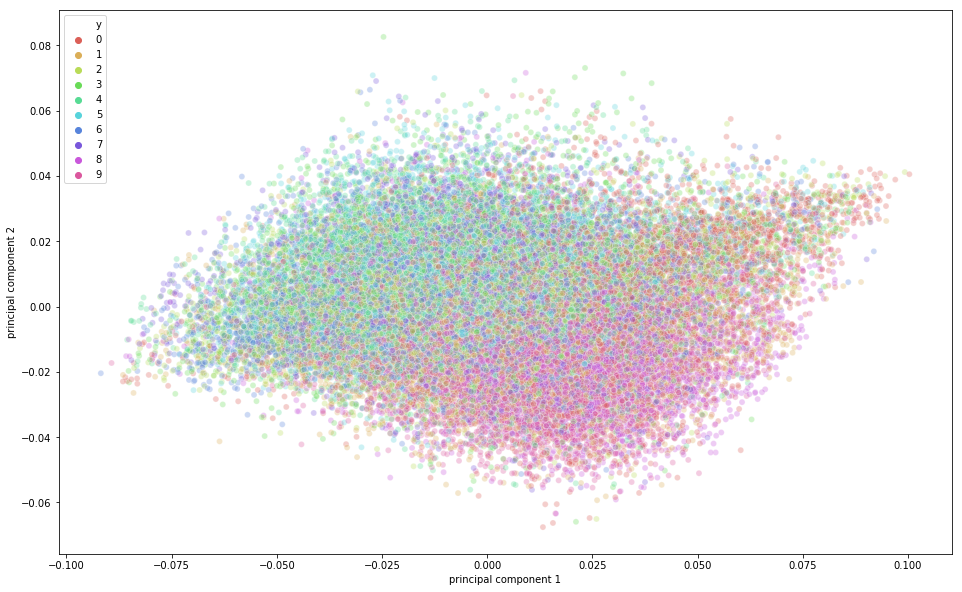

In [19]:
#Visualizing 
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)